<a href="https://colab.research.google.com/github/tijeco/berteome/blob/dev/notebooks/scratch/06_scoring_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So this will definitely take the most amount of work, but I think will be really cool! I'll need to spell out some basics about position specific scoring matrices and all their adacent goodies. There's a good write up on it somewhere, honestly, I think the seqlogo library had a good write up on it?? 

Nevertheless, this will lead into making things like seqlogos or calculating diversity / entropy values across columns, and can _maybe_ lead into making something similar in effect to a HMM type datastructure.. well maybe not that crazy.. but nevertheless!



In [2]:
!pip install "berteome @ git+https://github.com/tijeco/berteome@96c830219a42353732c2745916dd262f5f6b36f4"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tijeco/berteome (to revision 96c830219a42353732c2745916dd262f5f6b36f4) to /tmp/pip-install-36sgzoi7/berteome_b3654dfe21474211ba02b5cc4f47a4f1
  Running command git clone -q https://github.com/tijeco/berteome /tmp/pip-install-36sgzoi7/berteome_b3654dfe21474211ba02b5cc4f47a4f1
  Running command git rev-parse -q --verify 'sha^96c830219a42353732c2745916dd262f5f6b36f4'
  Running command git fetch -q https://github.com/tijeco/berteome 96c830219a42353732c2745916dd262f5f6b36f4
  Running command git checkout -q 96c830219a42353732c2745916dd262f5f6b36f4
     |████████████████████████████████| 5.8 MB 44.8 MB/s 
     |████████████████████████████████| 571 kB 82.1 MB/s 
     |████████████████████████████████| 7.6 MB 62.5 MB/s 
     |████████████████████████████████| 182 kB 61.5 MB/s 
  Created wheel for berteome: filename=berteome-0.1.5-py3-none-any.whl size=12836 sha256=69

In [20]:
!pip install seqlogo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!apt install ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 20 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Get:1 http:

In [22]:
!apt-get install -y pdf2svg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpoppler-glib8
The following NEW packages will be installed:
  libpoppler-glib8 pdf2svg
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 115 kB of archives.
After this operation, 476 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-glib8 amd64 0.62.0-2ubuntu2.14 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pdf2svg amd64 0.2.3-1 [6,728 B]
Fetched 115 kB in 0s (1,364 kB/s)
Selecting previously unselected package libpoppler-glib8:amd64.
(Reading database ... 125080 files and directories currently installed.)
Preparing to unpack .../libpoppler-glib8_0.62.0-2ubuntu2.14_amd64.deb ...
Unpack

In [23]:
from berteome import berteome
import seqlogo

In [4]:
berteome_models = berteome.modelLoader()
bert_tokenizer, bert_model = berteome_models.load_model("Rostlab/prot_bert")
mendel_berteome = berteome.modelPredDF("MENDEL",bert_tokenizer, bert_model)

Downloading:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/361 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The first thing to do is to transpose the dataframe so that the amino acids are the rows and the wt are the columns

In [5]:
mendel_berteome.predDf

,wt,wtIndex,wtScore,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,M,1,0.076601,0.036697,0.011504,0.048245,0.118907,0.024072,0.039202,0.012621,...,0.076601,0.072661,0.024722,0.038672,0.043104,0.070280,0.056544,0.049927,0.007781,0.021699
1,E,2,0.074830,0.045721,0.015662,0.041921,0.074830,0.037153,0.044325,0.018264,...,0.043581,0.062667,0.025277,0.036911,0.055543,0.064424,0.049955,0.056789,0.012691,0.029893
2,N,3,0.041990,0.043564,0.009685,0.162591,0.184365,0.033782,0.044661,0.012355,...,0.041484,0.041990,0.019992,0.025515,0.029433,0.048105,0.030303,0.054742,0.007430,0.024924
3,D,4,0.049748,0.042082,0.013244,0.049748,0.086194,0.039736,0.055911,0.016861,...,0.040080,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596
4,E,5,0.086915,0.046641,0.018770,0.079823,0.086915,0.050638,0.050466,0.022397,...,0.028962,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034
5,L,6,0.060736,0.038191,0.009217,0.065189,0.152547,0.020950,0.049525,0.013955,...,0.040042,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727


In [19]:
mendel_berteome_trans = mendel_berteome.predDf.set_index("wt")[list(mendel_berteome.aas)].T
mendel_berteome_trans

wt,M,E,N,D,E,L
A,0.036697,0.045721,0.043564,0.042083,0.046641,0.038191
C,0.011504,0.015662,0.009685,0.013244,0.018770,0.009217
D,0.048245,0.041921,0.162590,0.049748,0.079822,0.065189
E,0.118906,0.074830,0.184364,0.086194,0.086915,0.152547
F,0.024072,0.037153,0.033782,0.039736,0.050638,0.020950
G,0.039202,0.044325,0.044661,0.055911,0.050466,0.049525
H,0.012621,0.018264,0.012355,0.016861,0.022397,0.013955
I,0.066498,0.073077,0.052630,0.073296,0.074501,0.064596
K,0.107769,0.104815,0.035023,0.091365,0.064585,0.109141
L,0.072495,0.106501,0.097427,0.109088,0.090807,0.060736


In [21]:
mendel_berteome_trans["M"].sum()

0.9999999999999999

## seqlogo

In [28]:
mendel_berteome_aas = mendel_berteome.predDf[list(mendel_berteome.aas)]
mendel_berteome_seqlogoPPM = seqlogo.Ppm(mendel_berteome_aas,alphabet_type = "AA")
mendel_berteome_seqlogoPPM 

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.036697,0.011504,0.048245,0.118907,0.024072,0.039202,0.012621,0.066498,0.107768,0.072495,0.076601,0.072661,0.024722,0.038672,0.043104,0.070280,0.056544,0.049927,0.007781,0.021699
1,0.045721,0.015662,0.041921,0.074830,0.037153,0.044325,0.018264,0.073076,0.104815,0.106501,0.043581,0.062667,0.025277,0.036911,0.055543,0.064424,0.049955,0.056789,0.012691,0.029893
2,0.043564,0.009685,0.162591,0.184365,0.033782,0.044661,0.012355,0.052629,0.035023,0.097427,0.041484,0.041990,0.019992,0.025515,0.029433,0.048105,0.030303,0.054742,0.007430,0.024924
3,0.042082,0.013244,0.049748,0.086194,0.039736,0.055911,0.016861,0.073296,0.091365,0.109087,0.040080,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596
4,0.046641,0.018770,0.079823,0.086915,0.050638,0.050466,0.022397,0.074501,0.064585,0.090806,0.028962,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034
5,0.038191,0.009217,0.065189,0.152547,0.020950,0.049525,0.013955,0.064596,0.109141,0.060736,0.040042,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727


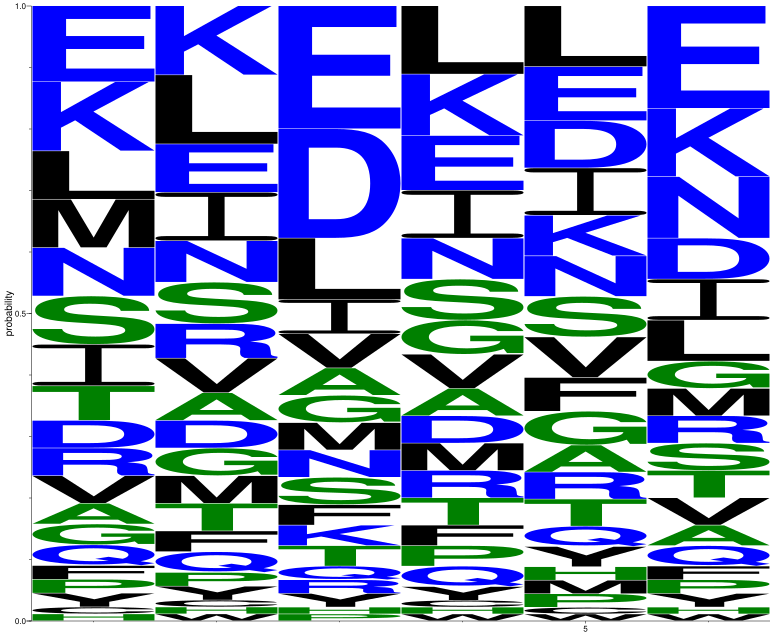

In [29]:
seqlogo.seqlogo(mendel_berteome_seqlogoPPM ,ic_scale = False, format = 'svg', size = 'xlarge')

## Site-specific variability 

The effective number of amino acids (N-eff) as a measure of site-specific variability. The $N_{eff}$ at site $i$
is defined as
$N_{eff}(i) = exp(-\sum p_{ji} \ln p_{ji})$



In [8]:
import numpy as np

In [24]:
np.log(mendel_berteome_trans["M"])

A   -3.305059
C   -4.465044
D   -3.031473
E   -2.129426
F   -3.726722
G   -3.239022
H   -4.372379
I   -2.710581
K   -2.227767
L   -2.624241
M   -2.569128
N   -2.621956
P   -3.700064
Q   -3.252641
R   -3.144125
S   -2.655273
T   -2.872742
V   -2.997188
W   -4.856039
Y   -3.830500
Name: M, dtype: float64

In [28]:
mendel_berteome_trans["M"]

A    0.036697
C    0.011504
D    0.048245
E    0.118906
F    0.024072
G    0.039202
H    0.012621
I    0.066498
K    0.107769
L    0.072495
M    0.076602
N    0.072661
P    0.024722
Q    0.038672
R    0.043105
S    0.070280
T    0.056544
V    0.049927
W    0.007781
Y    0.021699
Name: M, dtype: float64

In [29]:
mendel_berteome_trans["M"] * np.log(mendel_berteome_trans["M"])

A   -0.121286
C   -0.051367
D   -0.146252
E   -0.253201
F   -0.089708
G   -0.126977
H   -0.055185
I   -0.180249
K   -0.240084
L   -0.190244
M   -0.196801
N   -0.190513
P   -0.091473
Q   -0.125786
R   -0.135526
S   -0.186612
T   -0.162435
V   -0.149641
W   -0.037786
Y   -0.083117
Name: M, dtype: float64

In [33]:
-(mendel_berteome_trans["M"] * np.log(mendel_berteome_trans["M"]) ).sum()

2.814241533902227

In [34]:
np.exp(-(mendel_berteome_trans["M"] * np.log(mendel_berteome_trans["M"]) ).sum())

16.68051937277253

Boom! And that's how you calculate N-effective per each residue in the protein! Hmm.. so now that I'm really thinking about it, this could just be a column in the original dataframe? Certainly doing the calculations would be a bit less fun at the row level than column level??

Nevertheless, we got something nice here!

In [6]:
mendel_berteome.predDf

,wt,wtIndex,wtScore,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,M,1,0.076601,0.036697,0.011504,0.048245,0.118907,0.024072,0.039202,0.012621,...,0.076601,0.072661,0.024722,0.038672,0.043104,0.070280,0.056544,0.049927,0.007781,0.021699
1,E,2,0.074830,0.045721,0.015662,0.041921,0.074830,0.037153,0.044325,0.018264,...,0.043581,0.062667,0.025277,0.036911,0.055543,0.064424,0.049955,0.056789,0.012691,0.029893
2,N,3,0.041990,0.043564,0.009685,0.162591,0.184365,0.033782,0.044661,0.012355,...,0.041484,0.041990,0.019992,0.025515,0.029433,0.048105,0.030303,0.054742,0.007430,0.024924
3,D,4,0.049748,0.042082,0.013244,0.049748,0.086194,0.039736,0.055911,0.016861,...,0.040080,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596
4,E,5,0.086915,0.046641,0.018770,0.079823,0.086915,0.050638,0.050466,0.022397,...,0.028962,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034
5,L,6,0.060736,0.038191,0.009217,0.065189,0.152547,0.020950,0.049525,0.013955,...,0.040042,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727


In [7]:
mendel_berteome_aas = mendel_berteome.predDf[list(mendel_berteome.aas)]
mendel_berteome_aas

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.036697,0.011504,0.048245,0.118907,0.024072,0.039202,0.012621,0.066498,0.107768,0.072495,0.076601,0.072661,0.024722,0.038672,0.043104,0.070280,0.056544,0.049927,0.007781,0.021699
1,0.045721,0.015662,0.041921,0.074830,0.037153,0.044325,0.018264,0.073076,0.104815,0.106501,0.043581,0.062667,0.025277,0.036911,0.055543,0.064424,0.049955,0.056789,0.012691,0.029893
2,0.043564,0.009685,0.162591,0.184365,0.033782,0.044661,0.012355,0.052629,0.035023,0.097427,0.041484,0.041990,0.019992,0.025515,0.029433,0.048105,0.030303,0.054742,0.007430,0.024924
3,0.042082,0.013244,0.049748,0.086194,0.039736,0.055911,0.016861,0.073296,0.091365,0.109087,0.040080,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596
4,0.046641,0.018770,0.079823,0.086915,0.050638,0.050466,0.022397,0.074501,0.064585,0.090806,0.028962,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034
5,0.038191,0.009217,0.065189,0.152547,0.020950,0.049525,0.013955,0.064596,0.109141,0.060736,0.040042,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727


In [14]:
mendel_berteome_entropy = -(np.log(mendel_berteome_aas) * mendel_berteome_aas)
mendel_berteome_entropy

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.121286,0.051367,0.146253,0.253202,0.089708,0.126977,0.055184,0.180249,0.240083,0.190244,0.196800,0.190513,0.091472,0.125786,0.135526,0.186611,0.162435,0.149642,0.037786,0.083117
1,0.141058,0.065098,0.132972,0.193999,0.122334,0.138127,0.073107,0.191186,0.236416,0.238520,0.136545,0.173583,0.092965,0.121780,0.160552,0.176669,0.149697,0.162895,0.055421,0.104928
2,0.136509,0.044913,0.295349,0.311731,0.114447,0.138836,0.054285,0.154966,0.117389,0.226874,0.132021,0.133122,0.078217,0.093601,0.103770,0.145969,0.105955,0.159032,0.036422,0.092017
3,0.133322,0.057270,0.149283,0.211275,0.128167,0.161247,0.068838,0.191541,0.218627,0.241695,0.128933,0.170289,0.110204,0.128064,0.142112,0.172973,0.139340,0.166867,0.049170,0.096464
4,0.142968,0.074620,0.201787,0.212319,0.151056,0.150714,0.085082,0.193475,0.176948,0.217847,0.102577,0.172814,0.089181,0.106531,0.129838,0.178006,0.139418,0.182864,0.053606,0.124344
5,0.124700,0.043198,0.177996,0.286832,0.080985,0.148835,0.059616,0.176967,0.241760,0.170135,0.128847,0.225616,0.080301,0.117386,0.143477,0.147923,0.142151,0.146316,0.047791,0.086003


In [16]:
np.exp(mendel_berteome_entropy.sum(axis = 1))

0    16.680502
1    17.599150
2    14.518506
3    17.561045
4    17.921403
5    16.068080
dtype: float64

In [17]:
def n_effective(berteome):
  berteome_df_aas = berteome.predDf[list(berteome.aas)]
  berteome_entropy =  -(np.log(berteome_df_aas) * berteome_df_aas)
  berteome.predDf["n_effective"] = np.exp(berteome_entropy.sum(axis = 1))

In [18]:
n_effective(mendel_berteome)

In [19]:
mendel_berteome.predDf

,wt,wtIndex,wtScore,A,C,D,E,F,G,H,...,N,P,Q,R,S,T,V,W,Y,n_effective
0,M,1,0.076601,0.036697,0.011504,0.048245,0.118907,0.024072,0.039202,0.012621,...,0.072661,0.024722,0.038672,0.043104,0.070280,0.056544,0.049927,0.007781,0.021699,16.680502
1,E,2,0.074830,0.045721,0.015662,0.041921,0.074830,0.037153,0.044325,0.018264,...,0.062667,0.025277,0.036911,0.055543,0.064424,0.049955,0.056789,0.012691,0.029893,17.599150
2,N,3,0.041990,0.043564,0.009685,0.162591,0.184365,0.033782,0.044661,0.012355,...,0.041990,0.019992,0.025515,0.029433,0.048105,0.030303,0.054742,0.007430,0.024924,14.518506
3,D,4,0.049748,0.042082,0.013244,0.049748,0.086194,0.039736,0.055911,0.016861,...,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596,17.561045
4,E,5,0.086915,0.046641,0.018770,0.079823,0.086915,0.050638,0.050466,0.022397,...,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034,17.921403
5,L,6,0.060736,0.038191,0.009217,0.065189,0.152547,0.020950,0.049525,0.013955,...,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727,16.068080
